# Get the grains for 600nm

In [1]:
## load packages
import numpy as np
import pandas as pd
from scipy.signal import stft
import matplotlib.pyplot as plt
from scipy.fft import  rfft, rfftfreq
from scipy.signal import butter, filtfilt

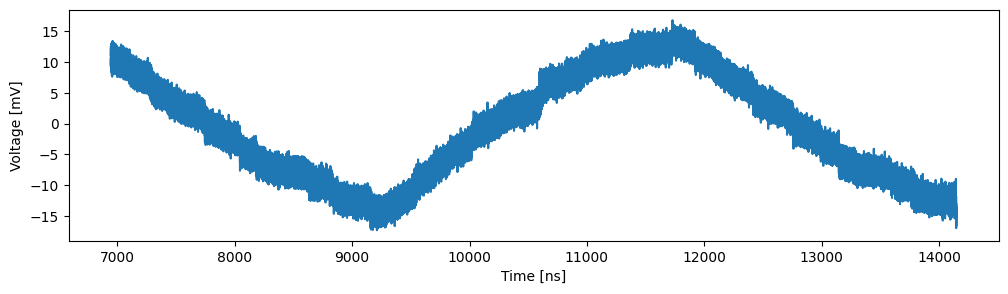

In [2]:
data = pd.read_csv("../Lab/Grainform/P8R1-goodgrains.wfm.csv")

data  = data.to_numpy()[:,0]
org_data_len = len(data)
# over one periode
t, dt = np.linspace(-4.2548e-6, 1.57452e-5, (org_data_len), retstep=True)
t = t[28_000_000:46_000_000]

data = data[28_000_000:46_000_000]
plt.figure(figsize=(12,3))
plt.plot(t*1e9, data*1000)
plt.ylabel("Voltage [mV]")
plt.xlabel("Time [ns]")
#plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/graindata_full.pdf")
plt.show()

In [3]:
-4.2548e-6 - 1.57452e-5

-1.9999999999999998e-05

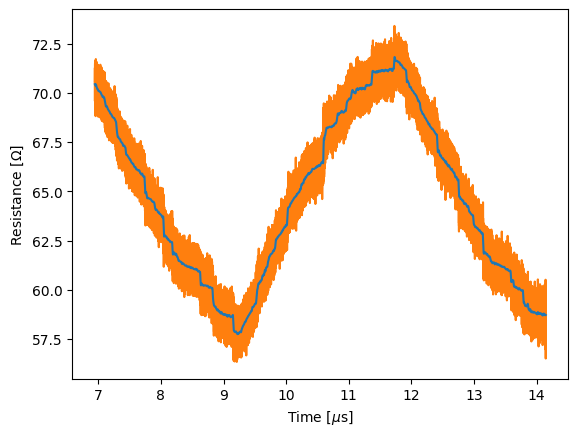

In [4]:

res0 = 65 # from memory
res = res0 + data/2e-3
#res = np.copy(data)

cut_off_freq = 750e6
b, a = butter(3,cut_off_freq/(1/63e-15))

plt.plot(t*1e6,filtfilt(b,a,res))
plt.plot(t*1e6,res, zorder =-1)

#plt.plot(t*1e6,np.gradient(filtfilt(b,a,res)))
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Resistance [$\Omega$]")
#plt.ylim(0,65)
plt.savefig("whole_grain_filtfilt.pdf")
plt.show()


In [5]:
300e6/(1/63e-15)

1.89e-05

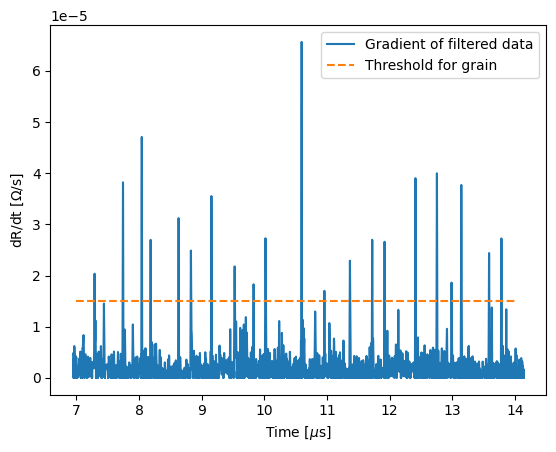

In [6]:
plt.plot(t*1e6, np.abs(np.gradient(filtfilt(b,a,res))), label="Gradient of filtered data")
plt.hlines(0.000015, 7, 14, ls = "--", color="tab:orange", label="Threshold for grain")
plt.xlabel("Time [$\mu$s]")
plt.ylabel("dR/dt [$\Omega$/s]")
plt.legend()
#plt.savefig("grain_gradient.pdf")


In [7]:
idx = [index for index, value in enumerate((np.gradient(filtfilt(b,a,res)))) if np.abs(value) > 0.000015]

idx_comp = []
last_idx = None

for i in idx:
    if last_idx is None or i - last_idx > 100_000:
        idx_comp.append(i)
        last_idx = i

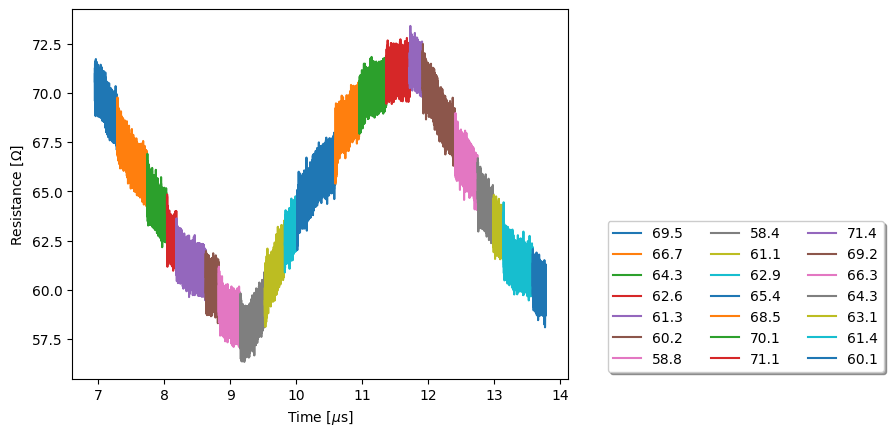

In [8]:
i_start = 0
label = []
#plt.figure(figsize=(20,5))
for i in idx_comp:
    i_end = i
    plt.plot(t[i_start:i_end]/1e-6, res[i_start:i_end])
    label.append(f"{round(np.mean(res[i_start:i_end]),1)}")
    i_start = i
    


plt.xlabel("Time [$\mu$s]")
plt.ylabel("Resistance [$\Omega$]")
plt.legend(label, loc=4, bbox_to_anchor=(1.65, 0),
          ncol=3, fancybox=True, shadow=True) # Lower right location
        
#plt.tight_layout()
#plt.savefig("../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/600nm_colorgrains.pdf", bbox_inches='tight')

### FFT in each grain

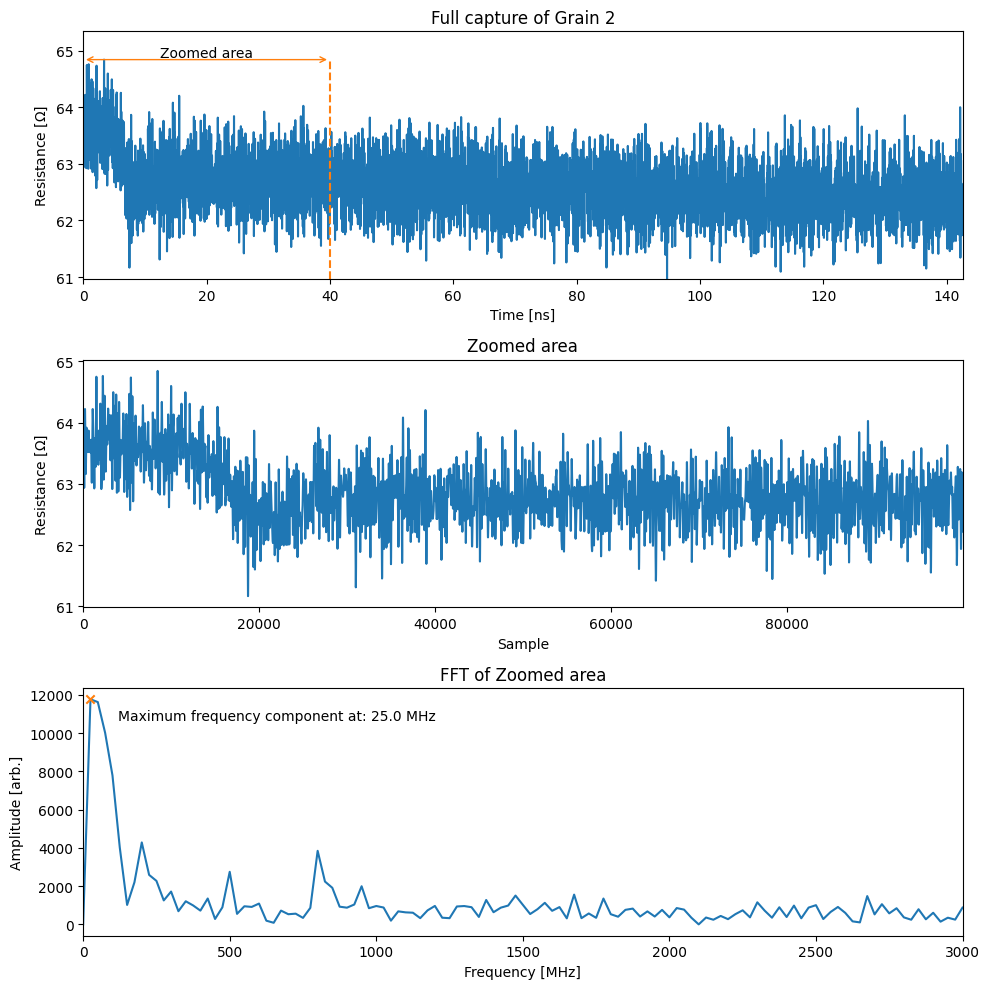

In [9]:
grain_length = int(40e-9/dt)

for i in [2]:  #range(len(idx_comp)-1)
    
    # --- Full grain ---
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(3,1,1)
    grain_data = (res[idx_comp[i]:idx_comp[i+1]])
    t = np.linspace(0, len(grain_data)*dt, len(grain_data))*1e9
    ax1.plot(t, grain_data)
    # Add arrow to indicate grain length
    ax1.annotate("", xy=(t[grain_length], np.max(grain_data)), 
                 xytext=(0, np.max(grain_data)), arrowprops=dict(arrowstyle="<->", color="tab:orange"))
    ax1.annotate(f"Zoomed area", xy=(t[grain_length]/2, np.max(grain_data)), ha='center', va='bottom')
    ax1.vlines(t[grain_length], np.min(grain_data), np.max(grain_data), color="tab:orange", linestyle="--")
    
    ax1.set_xbound(0,t[-1])
    ax1.set_ybound(np.min(grain_data), np.max(grain_data)+0.5)
    ax1.set_ylabel("Resistance [$\Omega$]")
    ax1.set_title(f"Full capture of Grain {i}")
    ax1.set_xlabel("Time [ns]")
    
    
    # --- Zoomed grain ---
    ax2 = plt.subplot(3,1,2)
    grain_data = (res[idx_comp[i]:idx_comp[i]+grain_length])
    ax2.plot(grain_data)
    ax2.set_xbound(0,grain_length)
    ax2.set_ylabel("Resistance [$\Omega$]")
    ax2.set_xlabel("Sample")
    ax2.set_title(f"Zoomed area")

    # --- Grain FFT ---
    fft = rfft(grain_data-np.mean(grain_data))
    fftfs = rfftfreq(len(grain_data), dt)
    ax3 = plt.subplot(3,1,3)
    ax3.plot(fftfs/1e6, np.abs(fft))
    ax3.set_xlim(0, 3000)
    ax3.set_xlabel("Frequency [MHz]")
    fmax = fftfs[np.argmax(np.abs(fft))]/1e6
    plt.annotate(f"Maximum frequency component at: {round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", 
                 (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), 
                 textcoords="offset points", xytext=(20,-15), ha='left')
    plt.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="tab:orange", zorder=10, marker="x")
    ax3.set_ylabel("Amplitude [arb.]")
    ax3.set_title(f"FFT of Zoomed area")
    
    # --- Saving ---
    plt.tight_layout()
    plt.savefig(f"../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/600nm_allgrains/grain_{i}.pdf", bbox_inches='tight')
    plt.show()

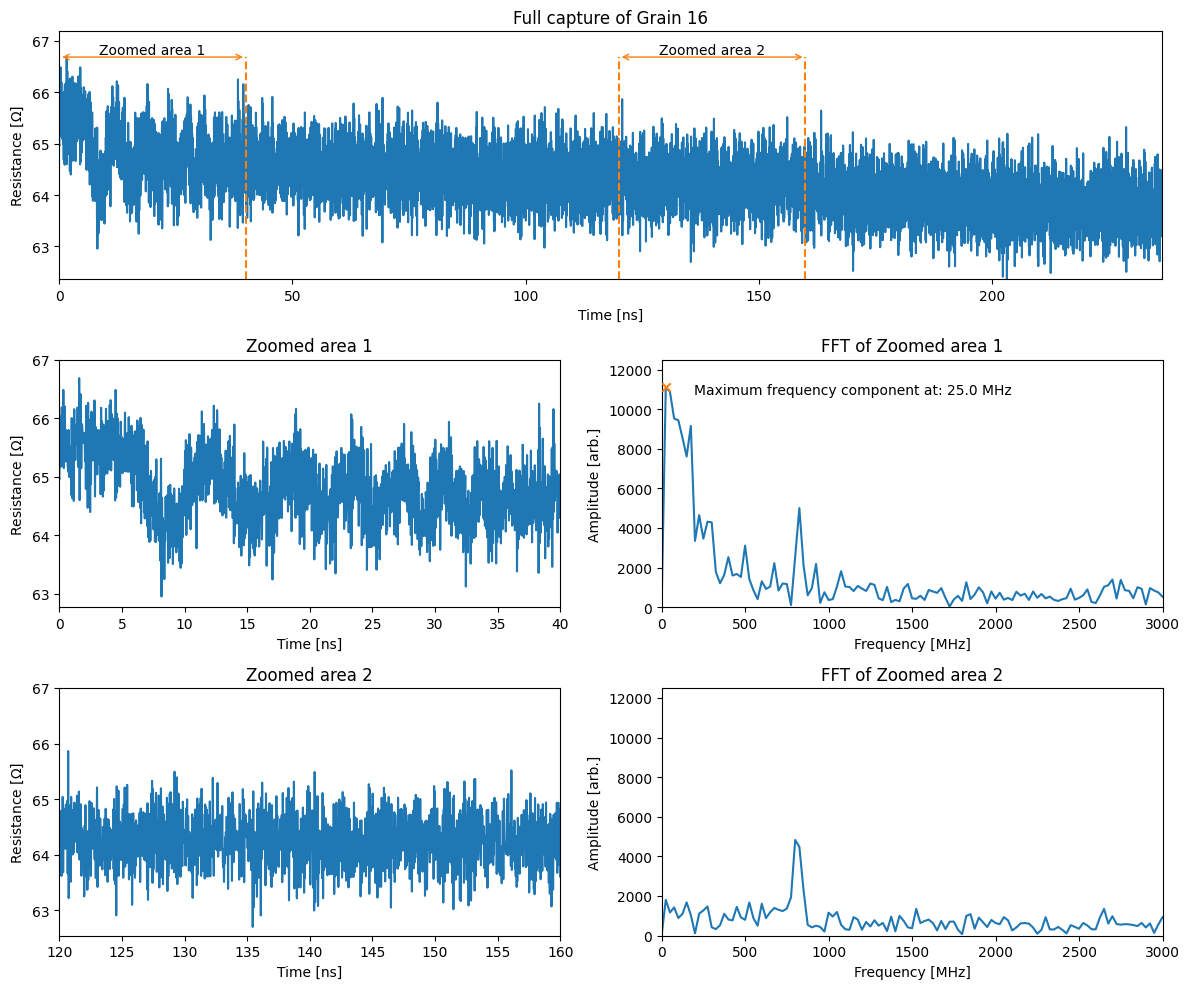

In [43]:
grain_length = int(40e-9/dt)

for i in [16]:  #range(len(idx_comp)-1)
    
    # --- Full grain ---
    plt.figure(figsize=(12,10))
    ax1 = plt.subplot(3,1,1)
    grain_data = (res[idx_comp[i]:idx_comp[i+1]])
    t = np.linspace(0, len(grain_data)*dt, len(grain_data))*1e9
    ax1.plot(t, grain_data)
    
    # Add arrow to indicate grain length
    ax1.annotate("", xy=(t[grain_length], np.max(grain_data)), 
                 xytext=(0, np.max(grain_data)), 
                 arrowprops=dict(arrowstyle="<->", color="tab:orange"))
    ax1.annotate(f"Zoomed area 1", xy=(t[grain_length]/2, np.max(grain_data)), ha='center', va='bottom')
    ax1.vlines(t[grain_length], np.min(grain_data), np.max(grain_data), color="tab:orange", linestyle="--")
    
    
    # Add arrow to indicate second zoomed area
    ax1.annotate("", xy=(t[grain_length*4], np.max(grain_data)), 
                 xytext=(t[grain_length*3], np.max(grain_data)), 
                 arrowprops=dict(arrowstyle="<->", color="tab:orange"))
    ax1.annotate(f"Zoomed area 2", xy=(t[int(grain_length*3.5)], np.max(grain_data)), ha='center', va='bottom')
    ax1.vlines(t[grain_length*3], np.min(grain_data), np.max(grain_data), color="tab:orange", linestyle="--")
    ax1.vlines(t[grain_length*4], np.min(grain_data), np.max(grain_data), color="tab:orange", linestyle="--")
    
    ax1.set_xbound(0,t[-1])
    ax1.set_ybound(np.min(grain_data), np.max(grain_data)+0.5)
    ax1.set_ylabel("Resistance [$\Omega$]")
    ax1.set_title(f"Full capture of Grain {i}")
    ax1.set_xlabel("Time [ns]")
    
    
    # --- Zoomed grain ---
    ax2 = plt.subplot(3,2,3)
    grain_data = (res[idx_comp[i]:idx_comp[i]+grain_length])
    
    ax2.plot(t[0:grain_length], grain_data)
    ax2.set_xbound(0,t[grain_length])
    ax2.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
    ax2.set_ylabel("Resistance [$\Omega$]")
    ax2.set_yticks([63, 64, 65, 66, 67])
    ax2.set_xlabel("Time [ns]")
    ax2.set_title(f"Zoomed area 1")
    
    # --- Grain FFT ---
    fft = rfft(grain_data-np.mean(grain_data))
    fftfs = rfftfreq(len(grain_data), dt)
    ax3 = plt.subplot(3,2,4)
    ax3.plot(fftfs/1e6, np.abs(fft))
    ax3.set_xlim(0, 3000)
    ax3.set_xlabel("Frequency [MHz]")
    fmax = fftfs[np.argmax(np.abs(fft))]/1e6
    plt.annotate(f"Maximum frequency component at: {round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", 
                 (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), 
                 textcoords="offset points", xytext=(20,-5), ha='left')
    plt.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="tab:orange", zorder=10, marker="x")
    ax3.set_ylabel("Amplitude [arb.]")
    ax3.set_ybound(-10, 12500)
    ax3.set_title(f"FFT of Zoomed area 1")
    
    
        # --- Zoomed grain 2 ---
    ax4 = plt.subplot(3,2,5)
    grain_data = (res[idx_comp[i]+grain_length*3:idx_comp[i]+grain_length*4])
    ax4.plot(t[grain_length*3:grain_length*4], grain_data)
    ax4.set_xbound(t[grain_length*3],t[grain_length*4])
    ax4.set_ylabel("Resistance [$\Omega$]")
    ax4.set_yticks([63, 64, 65, 66, 67])
    ax4.set_xticks([120, 125, 130, 135, 140, 145, 150, 155, 160])
    ax4.set_xlabel("Time [ns]")
    ax4.set_title(f"Zoomed area 2")
    
        # --- Grain FFT ---
    fft = rfft(grain_data-np.mean(grain_data))
    fftfs = rfftfreq(len(grain_data), dt)
    ax5 = plt.subplot(3,2,6)
    ax5.plot(fftfs/1e6, np.abs(fft))
    ax5.set_xlim(0, 3000)
    ax5.set_xlabel("Frequency [MHz]")
    fmax = fftfs[np.argmax(np.abs(fft))]/1e6
    ax5.set_ylabel("Amplitude [arb.]")
    ax5.set_ybound(-10, 12500)
    ax5.set_title(f"FFT of Zoomed area 2")
    
    # --- Saving ---
    plt.tight_layout()
    plt.savefig(f"../Dropbox/Apps/Overleaf/Speciale/Chapter4_lab/fig/600nm_allgrains/grain16_multizoom.pdf", bbox_inches='tight')
    plt.show()

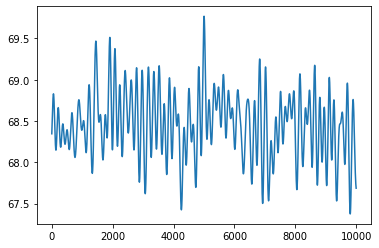

In [ ]:
int(40e-9/dt)

i = 5
plt.plot(res[idx[i]:idx[i]+10000])

142857142.85714287

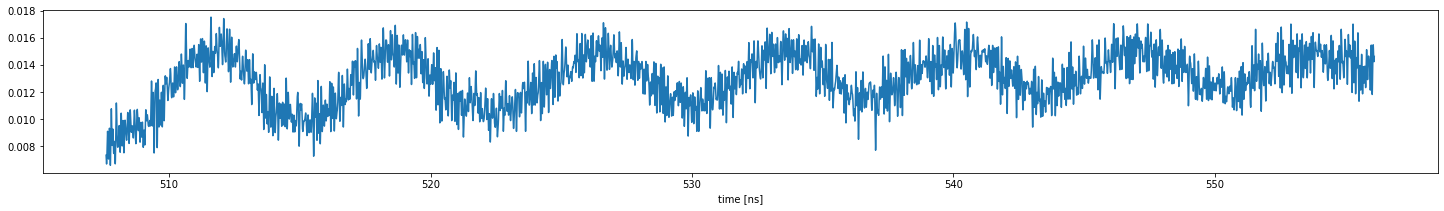

In [ ]:
## grains for 600nm-63ps
# grain 1 6200000-6600000
## grain 2 23930000 - 24700000

t, dt = np.linspace(-1e-6,1e-6,len(data),retstep=True)

# grian 1
#i_start =   6_200_000; i_end =     6_600_000

# grain 2
i_start =   23_930_000; i_end =     24_700_000

# grain 3 (mini jump)
#i_start =   26_930_000; i_end =     27_300_000



cropped_data = data[i_start:i_end]
cropped_t = t[i_start:i_end]

#plt.plot(np.linspace(-1e-6,1e-6,len(data[i_start:i_end])),data[i_start:i_end])
plt.figure(figsize=(25,3))
plt.plot(cropped_t/1e-9,cropped_data)
#plt.xlim(-0.615e-6,-0.55e-6)
plt.xlabel("time [ns]")
1/7e-9


max freq : 144.3 MHz


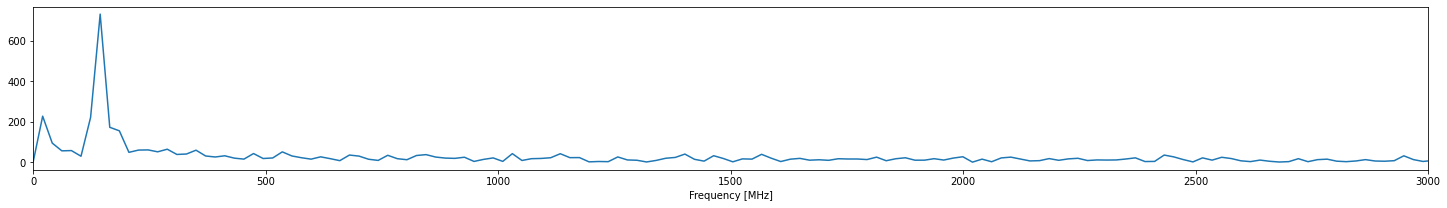

In [ ]:
#plt.plot(rfftfreq(len(data[i_start:i_end]), 63e-15), np.abs(rfft(data[i_start:i_end]-np.mean(data[i_start:i_end]))))

fft = rfft(cropped_data-np.mean(cropped_data))
fftfs = rfftfreq(len(cropped_data), dt)

plt.figure(figsize=(25,3))
plt.plot(fftfs/1e6, np.abs(fft))
plt.xlim(0,3000)
plt.xlabel("Frequency [MHz]")

fmax = fftfs[np.argmax(np.abs(fft))]/1e6
print(f'max freq : {round(fmax,2)} MHz')

# for 350nm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import rfft, rfftfreq
import gc

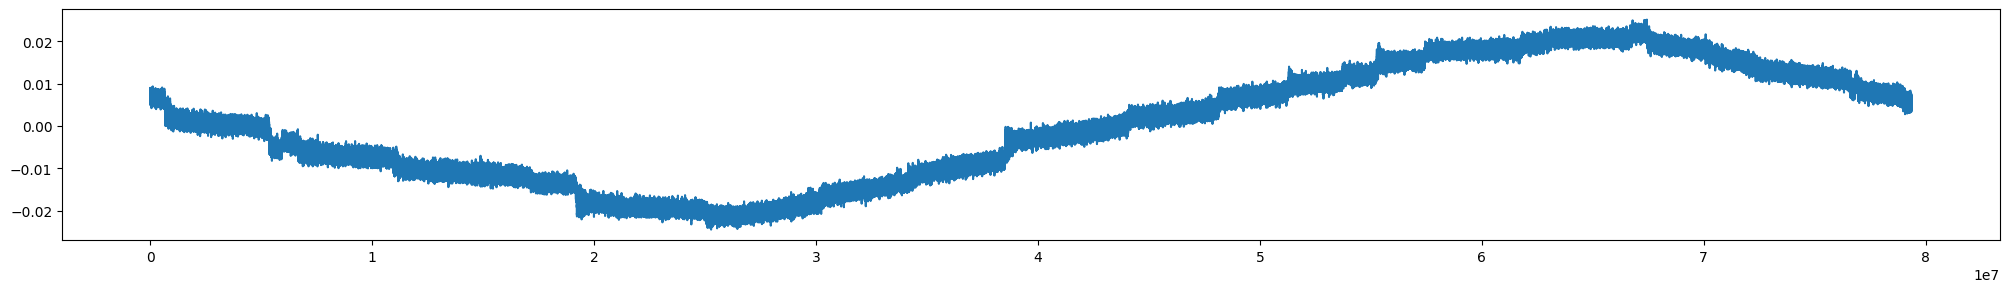

In [ ]:
res = pd.read_csv("../Lab/Grainform/350nm-63ps.wfm.csv").to_numpy()[:,0].astype("single")

#t, dt = np.linspace(-2.5e-6, 2.5e-6, len(data), retstep=True)


plt.figure(figsize=(25,3))
plt.plot(res)

In [ ]:
print(gc.collect())
print(gc.garbage)

21
[]


In [ ]:
t, dt = np.linspace(-2.5e-6, 2.5e-6, len(res), retstep=True)

In [ ]:
res0 = 245
res = np.add(res0, np.divide(res, 2e-3))

b, a = butter(3,0.00005)
#plt.plot(t,filtfilt(b,a,res))
#plt.plot(t,res, zorder =-1)

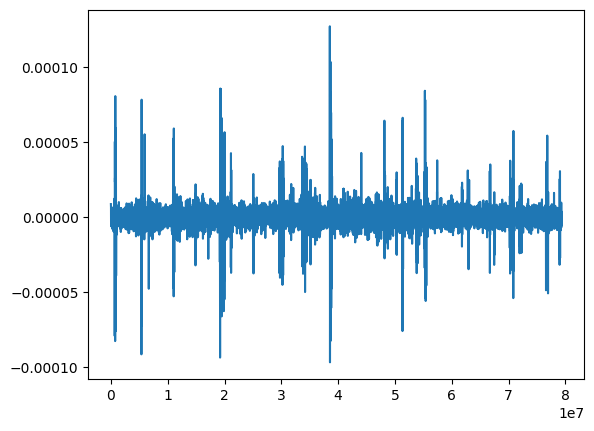

In [ ]:
#plt.plot(np.gradient(filtfilt(b,a,res)))

In [ ]:
idx = [index for index, value in enumerate((np.gradient(filtfilt(b,a,res)))) if value > 0.000025]

In [ ]:
idx_comp = []
last_idx = None

for i in idx:
    if last_idx is None or i - last_idx > 3_000_000:
        idx_comp.append(i)
        last_idx = i


In [ ]:
idx_comp

[692298,
 5394800,
 11018473,
 19241137,
 25063008,
 29631266,
 33645394,
 38514688,
 44062815,
 48125192,
 51283002,
 55152897,
 62809013,
 66679932,
 70282578,
 76605238]

In [ ]:
i_start = 0
label = []

for i in idx_comp:
    i_end = i
    plt.plot(t[i_start:i_end], res[i_start:i_end])
    label.append(f"{round(np.mean(res[i_start:i_end]),1)}")
    i_start=i
    

plt.Figure(figsize=(10,10))
plt.xlabel("Time [ns]")
plt.ylabel("Resistance [$\Omega$]")
plt.legend(label, loc=4, bbox_to_anchor=(1.5, 0),
          ncol=3, fancybox=True, shadow=True) # Lower right location
plt.savefig("350nm_colorgrains.pdf", bbox_inches='tight')

### FFT

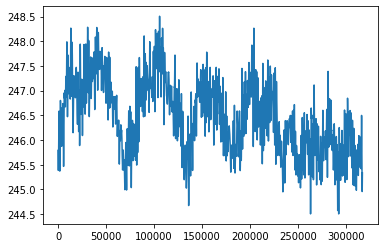

max freq : 50.0 MHz


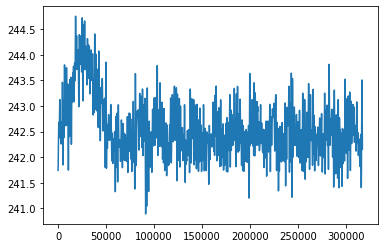

max freq : 50.0 MHz


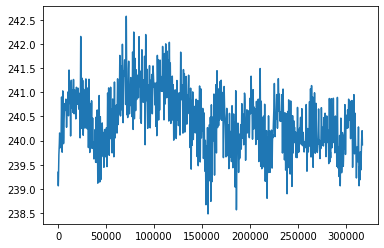

max freq : 50.0 MHz


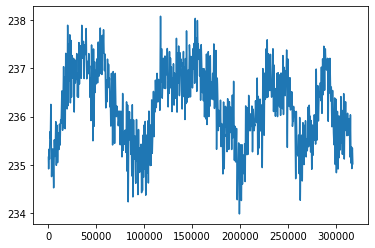

max freq : 150.0 MHz


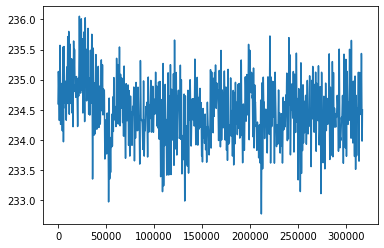

max freq : 800.0 MHz


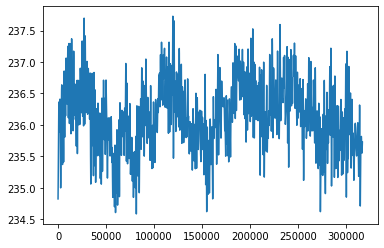

max freq : 150.0 MHz


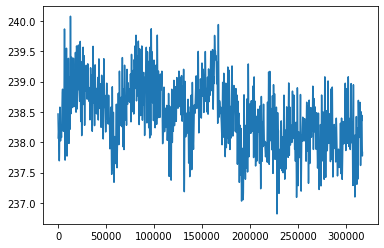

max freq : 50.0 MHz


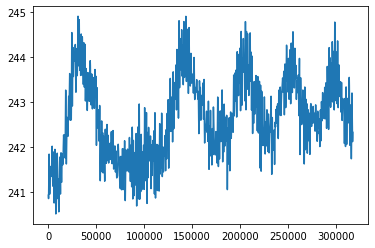

max freq : 300.0 MHz


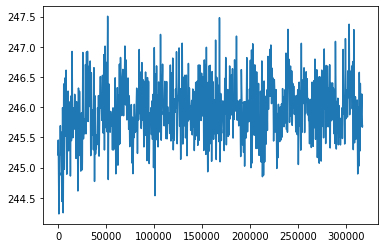

max freq : 850.0 MHz


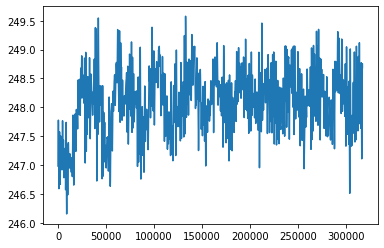

max freq : 450.0 MHz


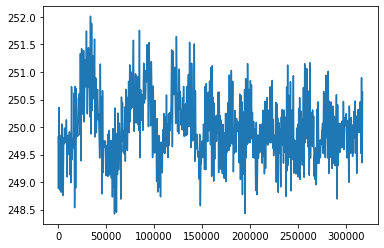

max freq : 300.0 MHz


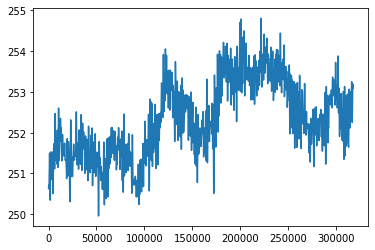

max freq : 50.0 MHz


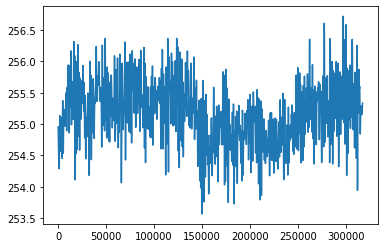

max freq : 50.0 MHz


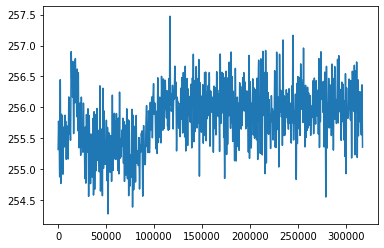

max freq : 50.0 MHz


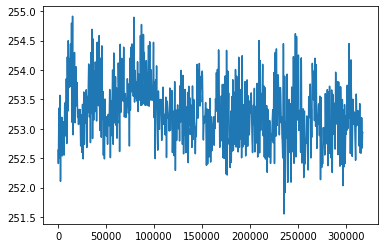

max freq : 50.0 MHz


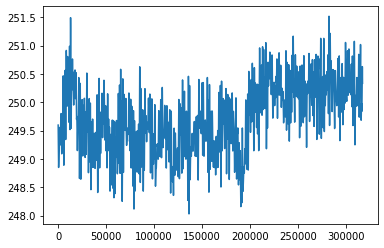

max freq : 50.0 MHz


In [ ]:
grain_length = int(20e-9/dt)

for i in range(len(idx_comp)):
    grain_data = (res[idx_comp[i]:idx_comp[i]+grain_length])
    plt.plot(grain_data)
    plt.show()
    fft = rfft(grain_data-np.mean(grain_data))
    fftfs = rfftfreq(len(grain_data), dt)

    fmax = fftfs[np.argmax(np.abs(fft))]/1e6
    print(f'max freq : {round(fmax,2)} MHz')

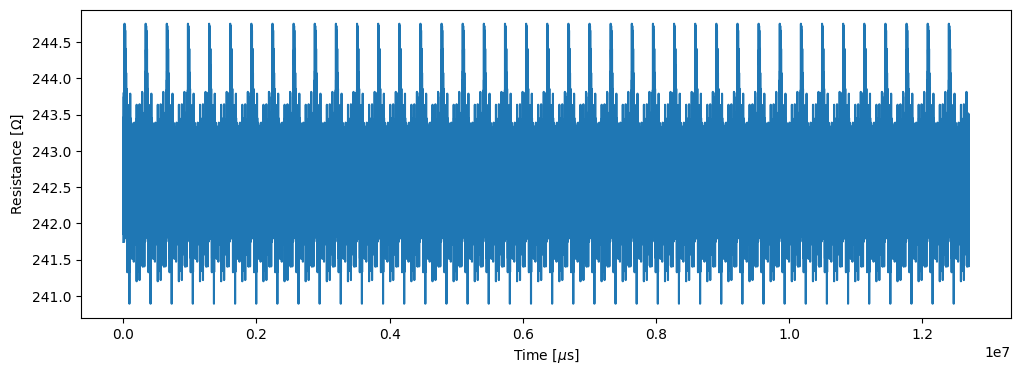

max freq : 100.0 MHz


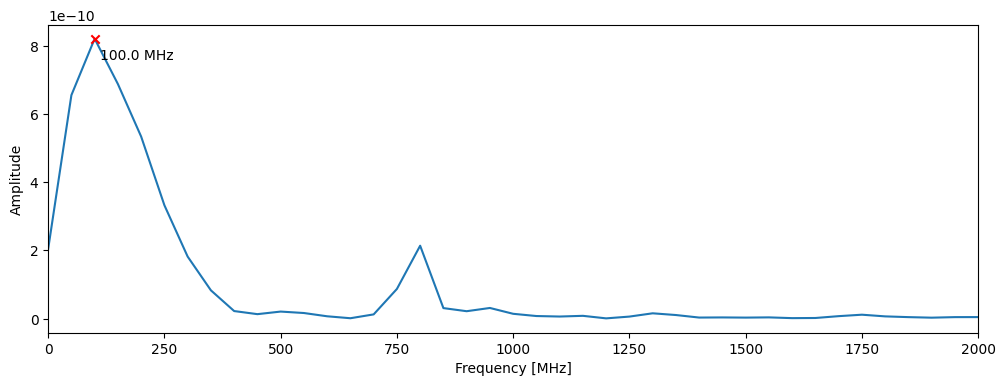

In [ ]:
from scipy.signal import welch

grain_length = int(20e-9/dt)
grain = 1

grain_data = (res[idx_comp[grain]:idx_comp[grain]+grain_length])
grain_data = np.concatenate((grain_data, grain_data, grain_data, grain_data, grain_data, 
                             grain_data, grain_data, grain_data, grain_data, grain_data))
grain_data = np.concatenate((grain_data, grain_data, grain_data, grain_data))
#grain_data = np.add(grain_data, np.random.normal(0, 1, len(grain_data)))
plt.figure(figsize=(12,4))
#plt.plot((t[idx_comp[grain]:idx_comp[grain]+grain_length]*1e6), grain_data)
plt.plot(grain_data)
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Resistance [$\Omega$]")
plt.savefig("grain_1_350nm.pdf")
plt.show()


#fft = rfft(grain_data-np.mean(grain_data))
#fftfs = rfftfreq(len(grain_data), dt)

fftfs, fft = welch(grain_data, fs=1/dt, nperseg=len(grain_data)/40)

plt.figure(figsize=(12,4))
plt.plot(fftfs/1e6, np.abs(fft))
plt.xlim(0,2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Amplitude")
plt.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="red", zorder=10, marker="x")
plt.annotate(f"{round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), textcoords="offset points", xytext=(30,-15), ha='center')
plt.savefig("grain_1_350nm_fft.pdf")

fmax = fftfs[np.argmax(np.abs(fft))]/1e6
print(f'max freq : {round(fmax,2)} MHz')

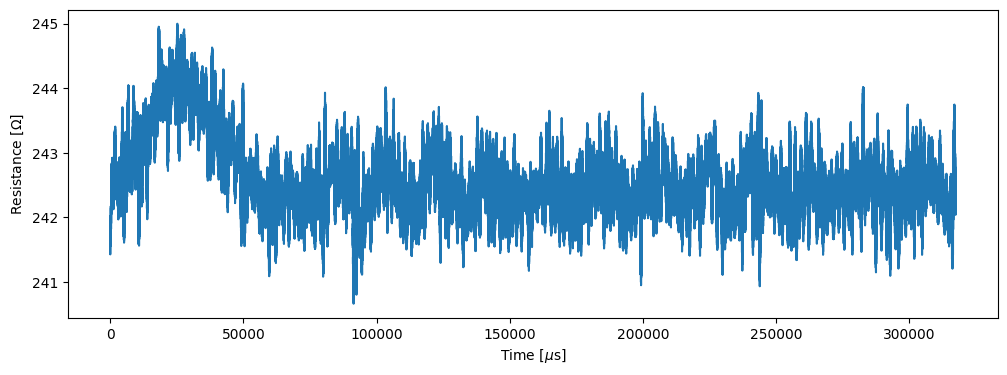

max freq : 50.0 MHz


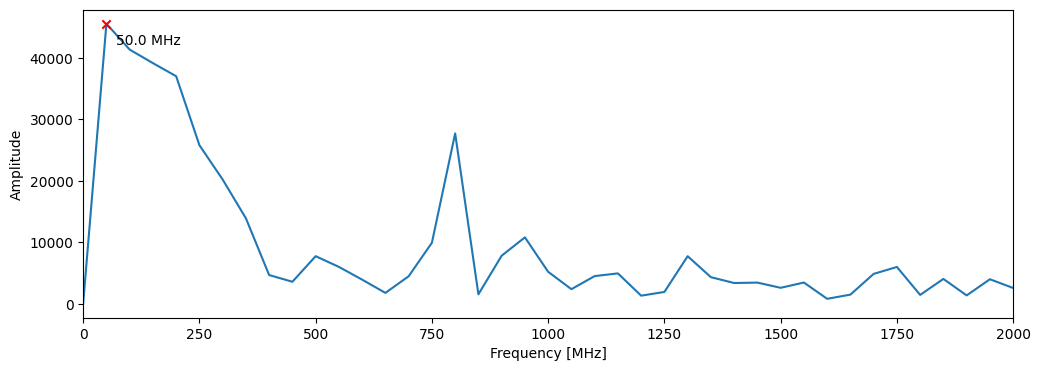

In [ ]:
grain_length = int(20e-9/dt)
grain = 1

grain_data = (res[idx_comp[grain]:idx_comp[grain]+grain_length])
#grain_data = np.concatenate((grain_data, grain_data, grain_data, grain_data, grain_data, 
#                             grain_data, grain_data, grain_data, grain_data, grain_data))
grain_data = np.add(grain_data, np.random.normal(0, 0.1, len(grain_data)))
plt.figure(figsize=(12,4))
#plt.plot((t[idx_comp[grain]:idx_comp[grain]+grain_length]*1e6), grain_data)
plt.plot(grain_data)
plt.xlabel("Time [$\mu$s]")
plt.ylabel("Resistance [$\Omega$]")
plt.savefig("grain_1_350nm.pdf")
plt.show()
fft = rfft(grain_data-np.mean(grain_data))
fftfs = rfftfreq(len(grain_data), dt)
plt.figure(figsize=(12,4))
plt.plot(fftfs/1e6, np.abs(fft))
plt.xlim(0,2000)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Amplitude")
plt.scatter(fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft)), color="red", zorder=10, marker="x")
plt.annotate(f"{round(fftfs[np.argmax(np.abs(fft))]/1e6,2)} MHz", (fftfs[np.argmax(np.abs(fft))]/1e6, np.max(np.abs(fft))), textcoords="offset points", xytext=(30,-15), ha='center')
plt.savefig("grain_1_350nm_fft.pdf")

fmax = fftfs[np.argmax(np.abs(fft))]/1e6
print(f'max freq : {round(fmax,2)} MHz')

In [ ]:
gc.collect()

6242

In [ ]:
len(idx_comp)

16

In [ ]:
thres = 1
for i, point in enumerate(res):
    if i in idx and i-thres not in idx:
        print("hello")

KeyboardInterrupt: 

Text(0.5, 0, 'time [ns]')

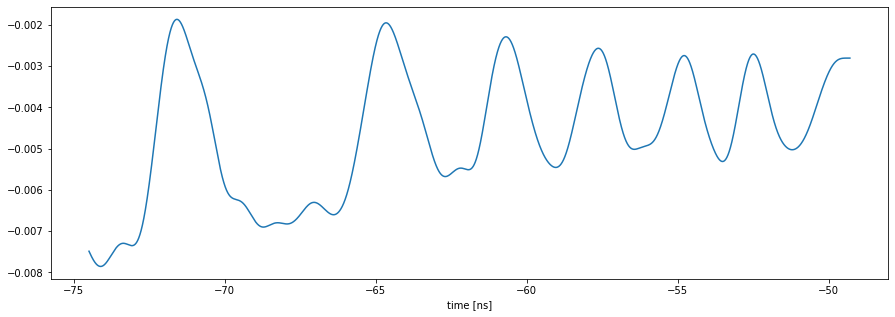

In [ ]:
t, dt = np.linspace(-2.5e-6,2.5e-6,len(data),retstep=True)

# grian 1
#i_start =   650_000; i_end =     1_000_000

# grain 2
#i_start =   5_300_000; i_end =     5_500_000

# grain 3 bad
#i_start =   10_800_000; i_end =     12_000_000

# grain 4 
#i_start =   19_150_000; i_end = 19_650_000


# grain 5
i_start =   38_500_000; i_end = 38_900_000


#cropped_data = data[i_start:i_end]
cropped_data = filtfilt(b,a,data[i_start:i_end])
cropped_t = t[i_start:i_end]

#plt.plot(np.linspace(-1e-6,1e-6,len(data[i_start:i_end])),data[i_start:i_end])
plt.figure(figsize=(15,5))
plt.plot(cropped_t/1e-9,cropped_data)
#plt.xlim(-0.615e-6,-0.55e-6)
plt.xlabel("time [ns]")

max freq : 277.78 MHz
freq resultion:  39.7 MHz


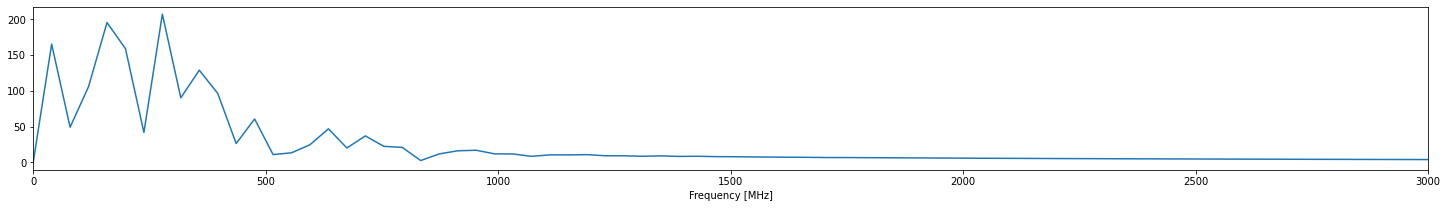

In [ ]:
fft = rfft(cropped_data-np.mean(cropped_data))
fftfs = rfftfreq(len(cropped_data), dt)

plt.figure(figsize=(25,3))
plt.plot(fftfs/1e6, np.abs(fft))
plt.xlim(0,3000)
plt.xlabel("Frequency [MHz]")

fmax = fftfs[np.argmax(np.abs(fft))]/1e6
print(f'max freq : {round(fmax,2)} MHz')
freqres = 1/(len(cropped_data)*dt)
print(f'freq resultion:  {round(freqres/1e6,1)} MHz')